## Importing Necessary Libraries


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import io
import sys

## Importing the Training Dataset

In [2]:
train_set = pd.read_excel("seeds_dataset_Randomized_for_HW.xlsx")

## Preliminary Data Description

In [3]:
train_set.head()   # Preliminary display of data set

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove,Class
0,14.43,14.40,0.8751,5.585,3.272,3.975,5.144,1
1,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
2,12.76,13.38,0.8964,5.073,3.155,2.828,4.830,3
3,12.11,13.47,0.8392,5.159,3.032,1.502,4.519,1
4,12.05,13.41,0.8416,5.267,2.847,4.988,5.046,3


In [4]:
train_set.describe()  # Summary statistics of data set

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Length of kerenel groove,Class
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,14.868485,14.568939,0.871062,5.632374,3.261237,3.659748,5.411753,1.994949
std,2.912254,1.307944,0.023719,0.444037,0.378294,1.492139,0.490131,0.815444
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.230000,13.450000,0.856900,5.253000,2.944000,2.472500,5.045250,1.000000
50%,14.405000,14.380000,0.873100,5.534000,3.243500,3.597500,5.223000,2.000000
75%,17.305000,15.715000,0.887325,5.993500,3.561750,4.695750,5.878500,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [5]:
train_set.info()  # Checks for data types contained within each colum and assesses completeness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      198 non-null    float64
 1   Perimeter                 198 non-null    float64
 2   Compactness               198 non-null    float64
 3   Length                    198 non-null    float64
 4   Width                     198 non-null    float64
 5   Asymmetry                 198 non-null    float64
 6   Length of kerenel groove  198 non-null    float64
 7   Class                     198 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.5 KB


## Statistical Feature Selection

##### Data preparation visualisation

In [12]:
train_set_arrays = np.asarray(train_set) # Converting the training set into numpy array for visualisation
print(train_set_arrays)


[[14.43   14.4     0.8751 ...  3.975   5.144   1.    ]
 [18.95   16.42    0.8829 ...  3.368   6.148   2.    ]
 [12.76   13.38    0.8964 ...  2.828   4.83    3.    ]
 ...
 [12.62   13.67    0.8481 ...  3.306   5.231   3.    ]
 [11.83   13.23    0.8496 ...  5.195   5.307   3.    ]
 [17.36   15.76    0.8785 ...  3.526   5.971   2.    ]]


In [23]:
# Assigning variables to the column of the numpy area
train_area=train_set_arrays[:,0]
train_perimeter=train_set_arrays[:,1]
train_compaction=train_set_arrays[:,2]
train_length1=train_set_arrays[:,3]
train_width=train_set_arrays[:,4]
train_asymmetry=train_set_arrays[:,5]
train_length2=train_set_arrays[:,6]
train_label=train_set_arrays[:,7]

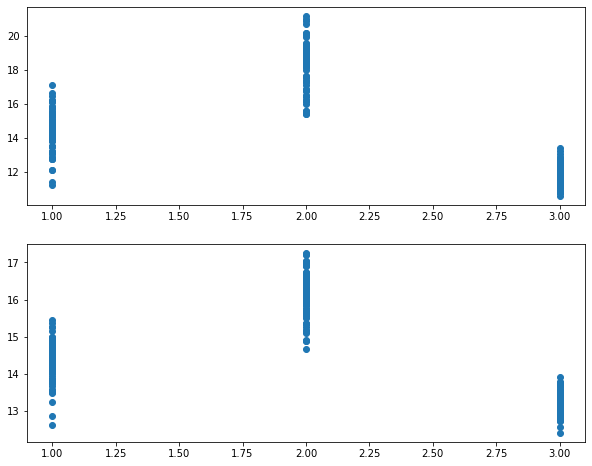

In [49]:
fig, ab = plt.subplots(2)

ab[0].plot(train_label,train_area, "o")
ab[1].plot(train_label,train_perimeter, "o")

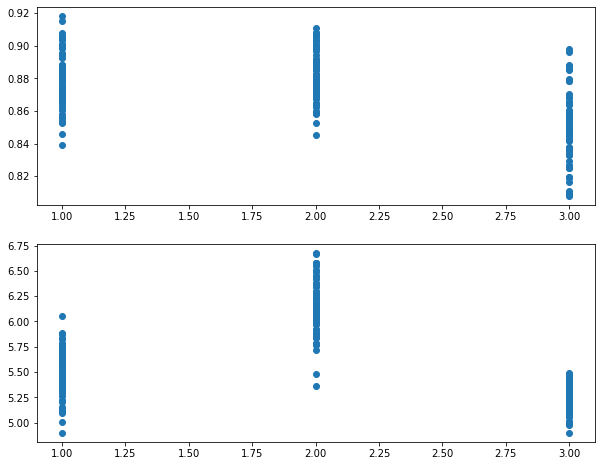

In [55]:
fig, cd = plt.subplots(2)

cd[0].plot(train_label,train_compaction, "o")
cd[1].plot(train_label,train_length1, "o");

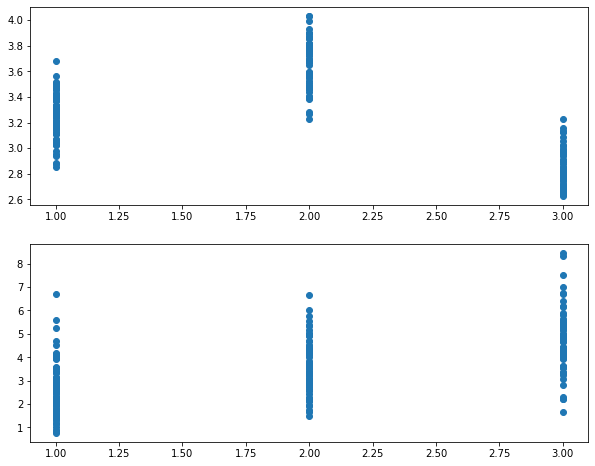

In [54]:
fig, ef = plt.subplots(2)

ef[0].plot(train_label,train_width, "o")
ef[1].plot(train_label,train_asymmetry, "o");


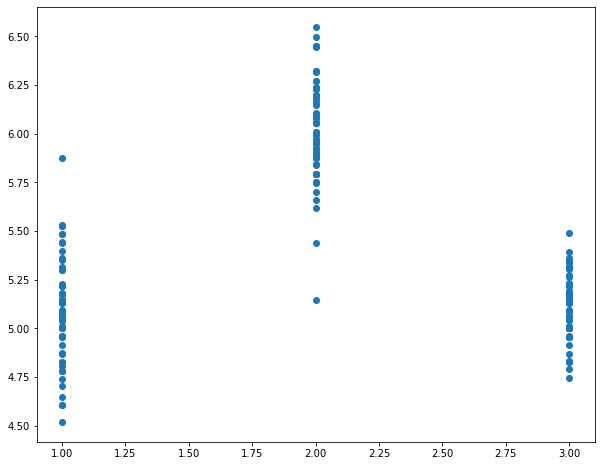

In [59]:
fig, g = plt.subplots()

g.plot(train_label,train_length2, "o");

### Using Pearson's corelation coefficient

In [71]:

area = np.corrcoef(train_label,train_area)

perimeter = np.corrcoef(train_label,train_perimeter)

compaction = np.corrcoef(train_label,train_compaction)

length1 = np.corrcoef(train_label,train_length1, "o")

width = np.corrcoef(train_label,train_width)

asymmetry = np.corrcoef(train_label, train_asymmetry)

length2 = np.corrcoef(train_label, train_length2)

In [79]:
print(area)

[[ 1.         -0.35102688]
 [-0.35102688  1.        ]]


In [80]:
print(perimeter)

[[ 1.         -0.33554134]
 [-0.33554134  1.        ]]


In [81]:
print(compaction)

[[ 1.         -0.51740061]
 [-0.51740061  1.        ]]


In [82]:
print(length1)

[[ 1.         -0.26568481]
 [-0.26568481  1.        ]]


In [83]:
print(width)

[[ 1.         -0.42599539]
 [-0.42599539  1.        ]]


In [84]:
print(asymmetry)

[[1.         0.56680018]
 [0.56680018 1.        ]]


In [85]:
print(length2)

[[1.         0.00959859]
 [0.00959859 1.        ]]


### Feature scaling was carried out on scale using the mean nomalisation methods

In [96]:
scaled_train_set = pd.read_excel("Normalised_dataset_Randomised_for_HW.xlsx")  # Loading the scaled features

In [88]:
scaled_train_set.head()   # Preliminary display of data set

,Normalised Area,Normalised Compaction,Normalised Length,Normalised Width,Normalised Asymmetry,Normalised Length of kerenel groove
0,-0.150566,0.170243,-0.106689,0.028451,0.211275,-0.546289
1,1.401497,0.499094,1.386423,1.305236,-0.195523,1.502143
2,-0.724004,1.068258,-1.259741,-0.280832,-0.557420,-1.186934
3,-0.947199,-1.343311,-1.066064,-0.605976,-1.446077,-1.821458
4,-0.967802,-1.242127,-0.822842,-1.095013,0.890166,-0.746235


In [89]:
scaled_train_set.describe()  # Summary statistics of data set

,Normalised Area,Normalised Compaction,Normalised Length,Normalised Width,Normalised Asymmetry,Normalised Length of kerenel groove
count,1.980000e+02,198.000000,1.980000e+02,1.980000e+02,1.980000e+02,1.980000e+02
mean,-5.202676e-08,-0.000016,-5.914486e-07,9.879548e-07,3.249352e-07,-9.686134e-07
std,1.000000e+00,0.999999,9.999960e-01,9.999995e-01,1.000000e+00,9.999994e-01
min,-1.469132e+00,-2.654496,-1.651598e+00,-1.668641e+00,-1.939932e+00,-1.821458e+00
25%,-9.059941e-01,-0.597074,-8.543709e-01,-8.385991e-01,-7.956685e-01,-7.477654e-01
50%,-1.591499e-01,0.085923,-2.215436e-01,-4.688681e-02,-4.171729e-02,-3.851072e-01
75%,8.366423e-01,0.685653,8.132754e-01,7.943901e-01,6.943066e-01,9.522903e-01
max,2.167227e+00,1.991568,2.348051e+00,2.040114e+00,3.214347e+00,2.322332e+00


In [90]:
kmeans_scaled_train_set = KMeans(n_clusters=3)  # Initialises Kmeans using 3 clusters

In [91]:
kmeans_scaled_train_set.fit(scaled_train_set) # fits the data into the initialised kmeans

KMeans(n_clusters=3)

In [93]:
print(kmeans_scaled_train_set.cluster_centers_)  # Prints the centers of the three KMeans cluster centroids

[[-1.061794   -1.0739856  -0.89635836 -1.14555252  0.83276956 -0.59549721]
 [-0.24864548  0.3940491  -0.38702203 -0.09337052 -0.64723144 -0.68744091]
 [ 1.18087742  0.5203597   1.1818175   1.09142796 -0.04676335  1.23444777]]


In [95]:
print(kmeans_scaled_train_set.labels_)  # Prints the labels assigned to each training example

[1 2 1 1 0 1 2 2 1 0 2 0 2 1 2 0 2 2 0 0 2 2 2 0 1 0 2 0 1 1 1 0 2 2 2 1 1
 2 1 1 2 2 2 1 0 0 1 0 1 2 1 2 1 2 2 1 1 1 2 0 1 1 2 1 1 2 1 0 0 1 0 2 2 2
 0 2 0 1 1 1 2 1 0 1 2 0 1 2 0 1 2 2 2 2 2 1 0 2 0 2 0 2 0 1 2 2 2 1 1 1 0
 0 1 0 0 2 1 1 2 2 0 1 0 1 0 2 2 1 0 2 2 0 1 0 2 1 0 1 1 0 0 0 0 0 0 2 0 0
 1 1 0 0 0 1 1 1 1 0 0 1 2 0 0 0 2 2 2 0 1 1 0 1 1 2 1 0 1 1 0 2 1 2 1 2 1
 2 1 2 2 2 2 2 1 1 1 0 0 2]


### Evaluation of the Optimisation Objectives

In [99]:
print(kmeans_scaled_train_set.inertia_)  # Displays the final cost value of the clusters

377.81019252168403


In [103]:
# Function to display the cost fucntion for every iteration

def ite_inertia(X):
    kmeans_scaled_train_set = KMeans(n_clusters=3,verbose=2, n_init=1)
    kmeans_scaled_train_set.fit(X)
    return kmeans_scaled_train_set

ite_inertia(scaled_train_set)


Initialization complete
Iteration 0, inertia 449.3325392952856
Iteration 1, inertia 384.72912990452784
Iteration 2, inertia 381.4350633318523
Iteration 3, inertia 380.2512852263085
Iteration 4, inertia 379.77375833910145
Iteration 5, inertia 379.4571217924722
Iteration 6, inertia 378.9191932072933
Iteration 7, inertia 378.3931131528621
Iteration 8, inertia 377.9559694672671
Iteration 9, inertia 377.8231648531797
Converged at iteration 9: strict convergence.


KMeans(n_clusters=3, n_init=1, verbose=2)

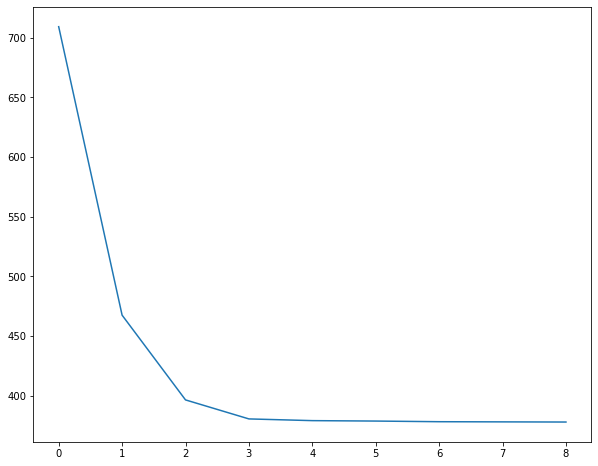

In [106]:
# Function to plot the cost function against the iterations

def redirect_wrapper(f, inp):
    old_stdout = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout

    returned = f(inp)                #<- Call function
    printed = new_stdout.getvalue()  #<- store printed output

    sys.stdout = old_stdout
    return returned, printed


returned, printed = redirect_wrapper(ite_inertia, scaled_train_set)

#Extract inertia values
inertia = [float(i[i.find('inertia')+len('inertia')+1:]) for i in printed.split('\n')[1:-2]]

#Plot!
plt.plot(inertia);

### Accuracy Analysis

In [110]:
pd.crosstab(train_label,kmeans_scaled_train_set.labels_, rownames=['Actual Label'], colnames=['KMeans Predicted Label'])

KMeans Predicted Label,0,1,2
Actual Label,,,
1.0,2,60,4
2.0,0,3,64
3.0,57,8,0


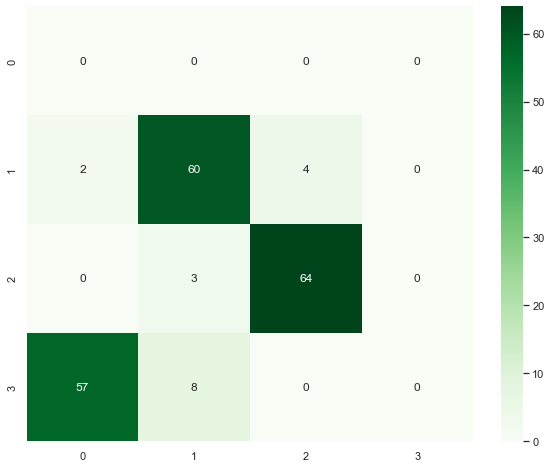

In [117]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_label,kmeans_scaled_train_set.labels_)


import seaborn as sns; sns.set()

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

In [119]:
def cluster_acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

In [120]:
cluster_acc(train_label, kmeans_scaled_train_set.labels_)

NameError: name 'linear_assignment' is not defined

In [107]:
print(train_label)

[1. 2. 3. 1. 3. 1. 2. 2. 1. 3. 2. 3. 2. 1. 2. 3. 2. 2. 3. 3. 2. 1. 2. 3.
 1. 3. 2. 3. 1. 1. 1. 3. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 3. 3. 1. 3.
 1. 2. 1. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 1. 3. 3. 2. 3. 2.
 2. 2. 3. 2. 3. 1. 1. 1. 2. 3. 3. 3. 2. 3. 1. 2. 3. 1. 2. 2. 2. 2. 2. 1.
 3. 2. 3. 2. 3. 2. 3. 1. 2. 2. 2. 1. 1. 1. 3. 3. 1. 3. 3. 2. 3. 3. 2. 2.
 3. 2. 3. 1. 3. 2. 2. 1. 3. 2. 2. 3. 1. 3. 2. 1. 3. 1. 1. 3. 3. 3. 3. 3.
 3. 1. 3. 3. 1. 1. 1. 3. 3. 1. 1. 1. 1. 3. 3. 1. 2. 3. 3. 3. 2. 2. 2. 3.
 1. 1. 3. 1. 3. 2. 1. 3. 1. 1. 3. 2. 1. 2. 1. 1. 3. 2. 1. 2. 2. 2. 2. 2.
 1. 1. 3. 3. 3. 2.]


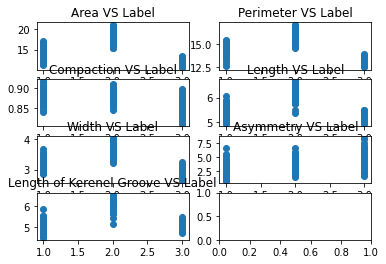

In [44]:
fig, ax = plt.subplots(4,2)

ax[0,0].plot(train_label,train_area, "o")
ax[0,0].set_title("Area VS Label")

ax[0,1].plot(train_label,train_perimeter, "o")
ax[0,1].set_title("Perimeter VS Label")

ax[1,0].plot(train_label,train_compaction, "o")
ax[1,0].set_title("Compaction VS Label")

ax[1,1].plot(train_label,train_length1, "o")
ax[1,1].set_title("Length VS Label")

ax[2,0].plot(train_label,train_width, "o")
ax[2,0].set_title("Width VS Label")

ax[2,1].plot(train_label, train_asymmetry, "o")
ax[2,1].set_title("Asymmetry VS Label")

ax[3,0].plot(train_label, train_length2, "o")
ax[3,0].set_title("Length of Kerenel Groove VS Label")


for _ in ax.flat:
    plt.xlabel='x-label'
    plt.ylabel='y-label'
    plt.fontsize=100


plt.show()

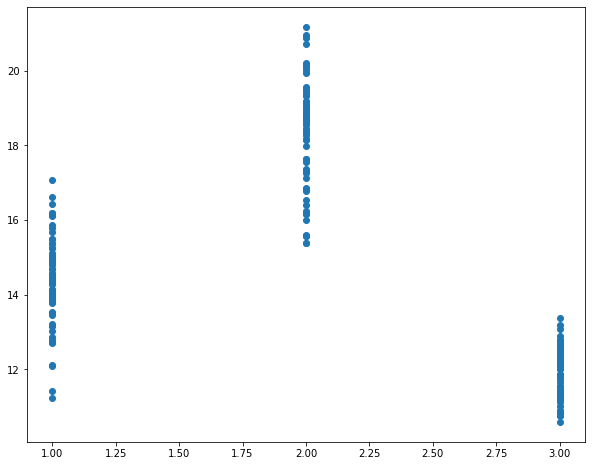

In [47]:
#### Visualising the data

plt.rcParams["figure.figsize"]=(10,8)   # Changing the size of the plot

# Changing the axis limit of the plot

# plt.ylim(0,18)  # This is not what you'll use just leaving this here to check
# plt.xlim(0,4)


# Adding labels
# plt.xlabel("Perimeter (p) ", fontsize=14)
# plt.ylabel("Area (A) ", fontsize=14)




plt.scatter(train_class,train_area,)   # Uses size and colour to represent the third and fourth variables


# compaction*100, length, cmap="rainbow"


Text(0.5, 1.0, 'Area VS Label')

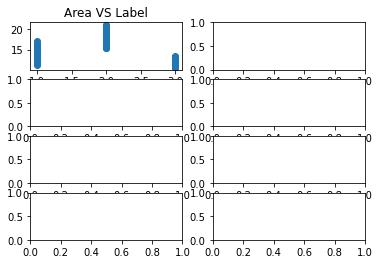

In [36]:
fig, ax = plt.subplots(4,2)

ax[0,0].plot(train_label,train_area, "o")
ax[0,0].set_title("Area VS Label")

## Conducting K Means for Training Set

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

fig.suptitle("Correlation relationship between all the features and the labels"
for _ in ax.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



